## $$\text{Árboles de clasificación}$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv('../data/Social_Network_Ads.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

# no precisamos el escalamiento ya que no tendría sentido

### Ajustamos el modelo

In [4]:
from sklearn.tree import DecisionTreeClassifier 

classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicción y matriz de confusión

In [5]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]])

### Representación gráfica

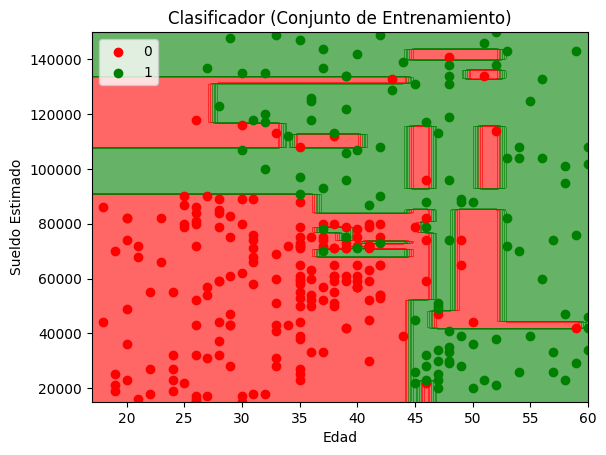

In [7]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,-1), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()